_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [1]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [2]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [9]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [10]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [11]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [12]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [13]:
pd.options.display.max_columns = 500
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [14]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder.org/gapminder-world/docu...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder.org/data/documentation/g...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,labour_force_participation


## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [24]:
merged=pd.merge(income, lifespan)
print(merged.shape)
merged.head()

(40437, 4)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,afg,1800,603,28.21
1,afg,1801,603,28.20
2,afg,1802,603,28.19
3,afg,1803,603,28.18
4,afg,1804,603,28.17


In [0]:
help(pd.merge)

In [25]:
merged1= pd.merge(merged, population)
print(merged1.shape)
merged1.head()

(40437, 5)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [42]:
df=pd.merge(merged1, entities[['country', 'name','world_4region','world_6region']], how='inner', left_on='geo', right_on='country')
print(df.shape)
df.head()

(40437, 9)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_4region,world_6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia


In [43]:
df=df.drop(columns=['geo', 'country'])
df= df.rename(columns= {
    'time':'year',
    'income_per_person_gdppercapita_ppp_inflation_adjusted':'income',
    'life_expectancy_years':'lifespan',
    'population_total':'population',
    'name':'country',
    'world_4region':'region4',
    'world_6region': 'region6'
      })
print(df.shape)
df.head()

(40437, 7)


,year,income,lifespan,population,country,region4,region6
0,1800,603,28.21,3280000,Afghanistan,asia,south_asia
1,1801,603,28.20,3280000,Afghanistan,asia,south_asia
2,1802,603,28.19,3280000,Afghanistan,asia,south_asia
3,1803,603,28.18,3280000,Afghanistan,asia,south_asia
4,1804,603,28.17,3280000,Afghanistan,asia,south_asia


In [44]:
df.isna().sum()

year          0
income        0
lifespan      0
population    0
country       0
region4       0
region6       0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40437 entries, 0 to 40436
Data columns (total 7 columns):
year          40437 non-null int64
income        40437 non-null int64
lifespan      40437 non-null float64
population    40437 non-null int64
country       40437 non-null object
region4       40437 non-null object
region6       40437 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 2.5+ MB


In [46]:
df.describe()

,year,income,lifespan,population
count,40437.000000,40437.000000,40437.000000,4.043700e+04
mean,1909.292900,4619.492717,43.132080,1.371204e+07
std,63.308682,10209.571045,16.313228,6.606335e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,876.000000,31.160000,4.113310e+05
50%,1909.000000,1442.000000,35.500000,1.985952e+06
75%,1964.000000,3488.000000,55.970000,6.499707e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [47]:
#for categorical variable
df.describe(exclude='number')

,country,region4,region6
count,40437,40437,40437
unique,187,4,6
top,Fiji,africa,europe_central_asia
freq,219,11826,10778


## Explore data

In [48]:
df.country.value_counts()

Fiji                        219
Timor-Leste                 219
Canada                      219
Ethiopia                    219
Guinea                      219
Vietnam                     219
Spain                       219
Afghanistan                 219
Ecuador                     219
Kyrgyz Republic             219
Thailand                    219
Macedonia, FYR              219
Lao                         219
Sweden                      219
Bangladesh                  219
Kazakhstan                  219
Niger                       219
Belgium                     219
Poland                      219
Bolivia                     219
Bahrain                     219
Australia                   219
Rwanda                      219
Grenada                     219
Togo                        219
Lebanon                     219
Eritrea                     219
Denmark                     219
Philippines                 219
Dominican Republic          219
                           ... 
Malawi  

In [0]:
df.country.unique()

In [58]:
usa=df[df.country=='United States']
usa[usa.year.isin([1818,1918,2018])]

,year,income,lifespan,population,country,region4,region6
38046,1818,2258,39.41,9879049,United States,americas,america
38146,1918,9371,47.18,106721812,United States,americas,america
38246,2018,54898,79.14,326766748,United States,americas,america


In [61]:
china = df[df.country == 'China']
china[china.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region4,region6
6854,1818,985,32.00,374161494,China,asia,east_asia_pacific
6954,1918,989,22.13,462444535,China,asia,east_asia_pacific
7054,2018,16018,76.92,1415045928,China,asia,east_asia_pacific


In [0]:
now=df[df.year==2018]

## Plot visualization

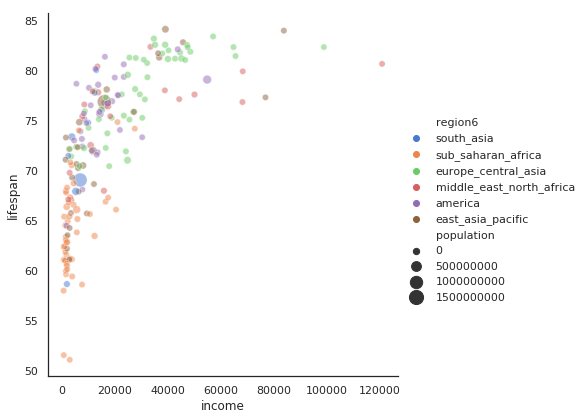

In [65]:
import seaborn as sns
sns.set(style="white")
sns.relplot(x="income", y="lifespan", hue="region6", size="population",
            sizes=(40, 200), alpha=.5, palette="muted", height=6, data=now);


## Analyze outliers

In [69]:
now[now.income> 80000].sort_values(by='income',ascending=False)

,year,income,lifespan,population,country,region4,region6
30362,2018,121033,80.71,2694849,Qatar,asia,middle_east_north_africa
22212,2018,99034,82.39,590321,Luxembourg,europe,europe_central_asia
31895,2018,83888,84.03,5791901,Singapore,asia,east_asia_pacific


In [0]:
qatar=now[now.country=='Qatar']
qatar_income=qatar.income.values[0]
qatar_lifespan=qatar.lifespan.values[0]

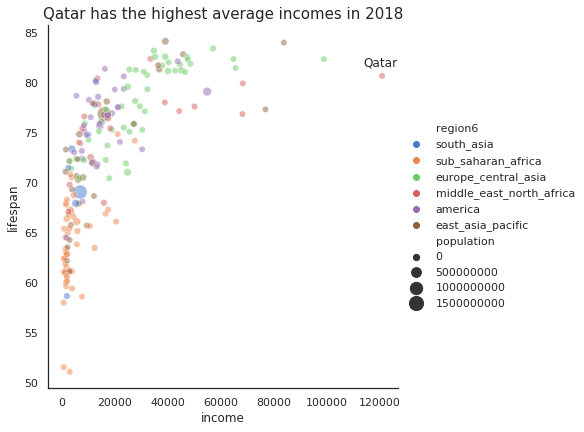

In [78]:
sns.relplot(x="income", y="lifespan", hue="region6", size="population",
            sizes=(40, 200), alpha=.5, palette="muted", height=6, data=now);

plt.title('Qatar has the highest average incomes in 2018', fontsize=15)
plt.text(x=qatar_income-7000, y=qatar_lifespan+1, s = 'Qatar');



In [76]:
qatar.income.values[0]

121033

## Plot multiple years

In [83]:
years=[1818,1918,2018]
countries=df[df.year.isin(years)]
countries.shape

(552, 7)

## Point out a story

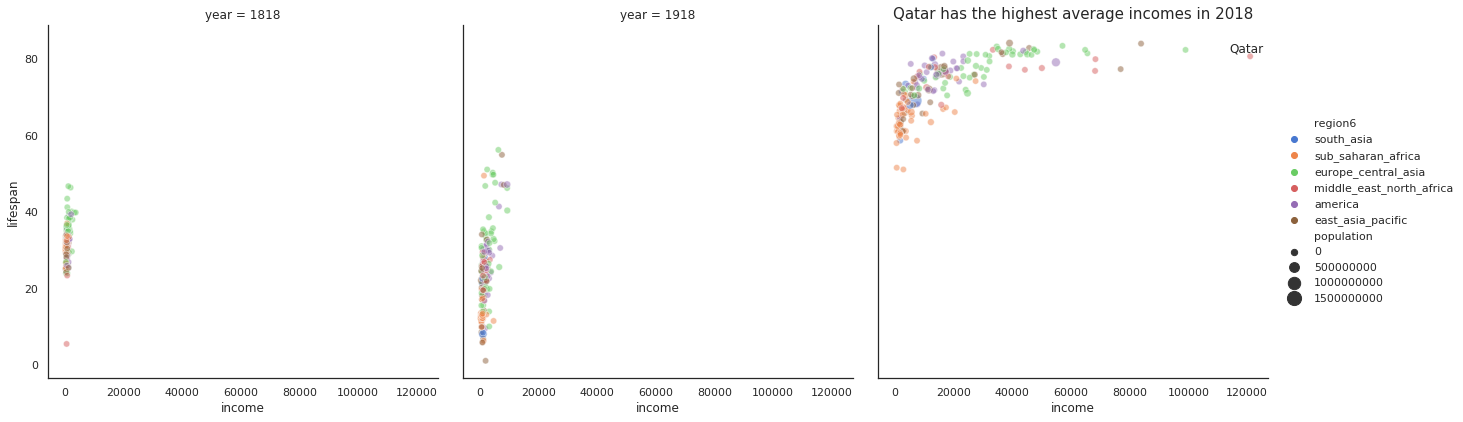

In [86]:
sns.relplot(x="income", y="lifespan", hue="region6", size="population",col='year',
            sizes=(40, 200), alpha=.5, palette="muted", height=6, data=countries);

plt.title('Qatar has the highest average incomes in 2018', fontsize=15)
plt.text(x=qatar_income-7000, y=qatar_lifespan+1, s = 'Qatar');



# ASSIGNMENT
Replicate the lesson code

# STRETCH OPTIONS

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site / project